<a href="https://colab.research.google.com/github/tiutiutiu666/SC_Team-Assignment-Chapter-2-Machine-Learning-and-Deep-Learning/blob/main/DEEP%20LEARNING%20%5BCase%20%233%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Chapter 2 - DEEP LEARNING [Case #3]
Startup Campus, Indonesia - `Artificial Intelligence (AI)` (Batch 7)
* Task: **REGRESSION**
* DL Framework: **Tensorflow-Keras**
* Dataset: California House Price
* Libraries: Pandas, Numpy, Scikit-learn, Matplotlib
* Objective: Predict House Pricing with Dual Input Settings using Multilayer Perceptron

`PERSYARATAN` Semua modul (termasuk versi yang sesuai) sudah di-install dengan benar.
<br>`CARA PENGERJAAN` Lengkapi baris kode yang ditandai dengan **#TODO**.
<br>`TARGET PORTFOLIO` Peserta mampu memprediksi harga rumah menggunakan *Multilayer Perceptron*

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

### Load Dataset

In [ ]:
housing = fetch_california_housing()
print("Features name: {}".format(housing.feature_names))
print("Features data:\n{}".format(housing.data))
print("Target data:\n{}".format(housing.target)) # target is the house price

Features name: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Features data:
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
Target data:
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
# TODO: Ubah "features" dan "target" dari Numpy Array ke Pandas DataFrame
datafr = pd.DataFrame(housing.data, columns=housing.feature_names)
datafr['price'] = housing.target
datafr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
datafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


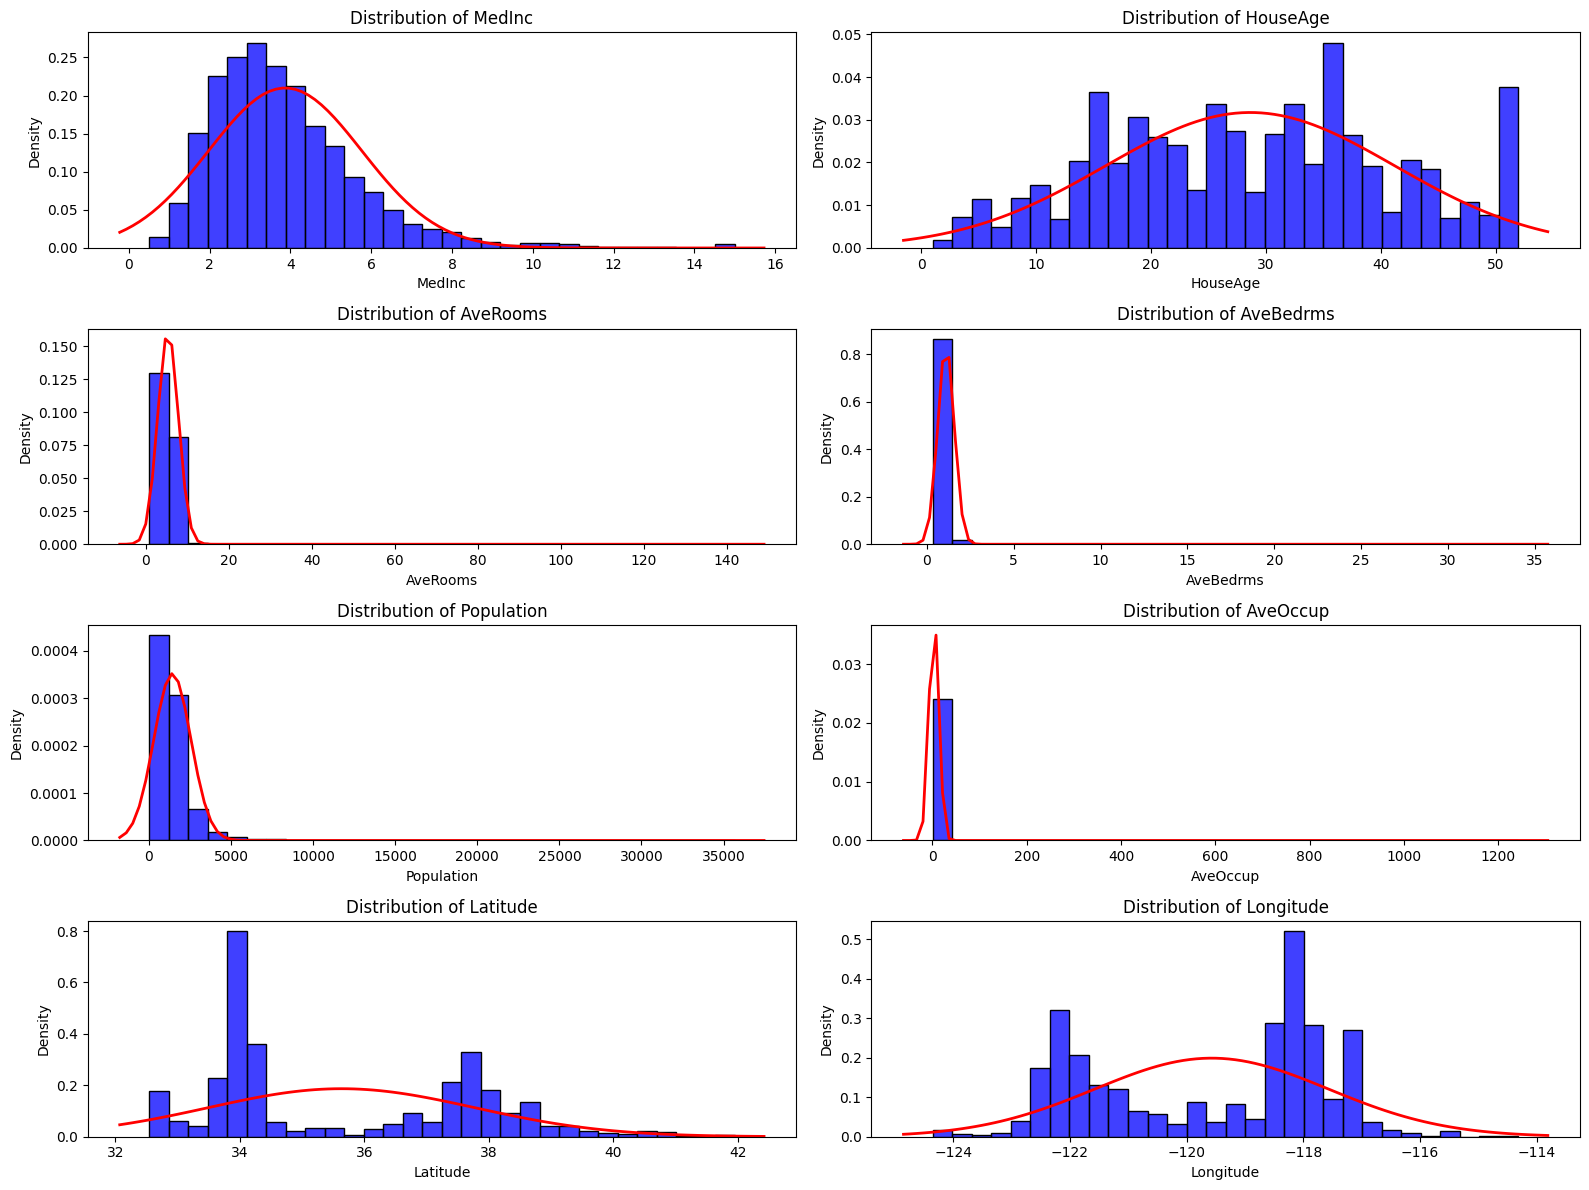

In [ ]:
import seaborn as sns
from scipy.stats import norm

# List fitur yang akan dicek distribusinya
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Ukuran plot
plt.figure(figsize=(16, 12))

# Iterasi setiap fitur dan visualisasi
for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)  # Buat subplot 4x2
    sns.histplot(datafr[feature], kde=False, stat="density", color='blue', bins=30)  # Buat histogram

    # Tambahkan garis bell curve (distribusi normal)
    mean = datafr[feature].mean()
    std = datafr[feature].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'r', linewidth=2)  # Plot garis bell curve

    # Tambahkan judul ke setiap plot
    plt.title(f'Distribution of {feature}')

# Tampilkan plot
plt.tight_layout()
plt.show()

### Train / Validation / Test Split

In [ ]:
# TODO: Pisahkan data menjadi train, validation, dan test
# HINT: Pertama, pisahkan data menjadi train dan test.
#       Selanjutnya, pisahkan data train menjadi dua, yaitu data train dan data validation.
X = datafr.drop('price', axis=1)
y = datafr['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

print("x_train", x_train.shape, "y_train", y_train.shape)
print("x_val", x_val.shape, "y_val", y_val.shape)
print("x_test", x_test.shape, "y_test", y_test.shape)

x_train (12384, 8) y_train (12384,)
x_val (4128, 8) y_val (4128,)
x_test (4128, 8) y_test (4128,)


In [ ]:
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17244,2.3681,39.0,3.922460,1.018717,1404.0,3.754011,34.43,-119.67
8817,10.1357,24.0,7.564516,0.985112,2248.0,2.789082,33.74,-118.32
19686,1.6719,41.0,3.908012,0.916914,856.0,2.540059,39.13,-121.62
3545,4.8333,9.0,5.201093,1.009836,1884.0,2.059016,34.24,-118.63
17019,5.5902,38.0,7.010127,0.979747,994.0,2.516456,37.52,-122.30


### Standardization and Normalization

In [ ]:
# TODO: Lakukan standarisasi untuk data train, validation, dan test menggunakan StandardScaler()
cols_std = [0, 1, 6, 7]

scaler_std = StandardScaler()
x_train.iloc[:, cols_std] = scaler_std.fit_transform(x_train.iloc[:, cols_std])
x_val.iloc[:, cols_std] = scaler_std.transform(x_val.iloc[:, cols_std])
x_test.iloc[:, cols_std] = scaler_std.transform(x_test.iloc[:, cols_std])

print("x_train:", x_train.shape)
print("x_val:", x_val.shape)
print("x_test:", x_test.shape)

x_train: (12384, 8)
x_val: (4128, 8)
x_test: (4128, 8)


In [ ]:
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17244,-0.795478,0.826025,3.922460,1.018717,1404.0,3.754011,-0.568777,-0.044972
8817,3.318366,-0.363737,7.564516,0.985112,2248.0,2.789082,-0.892586,0.628346
19686,-1.164196,0.984660,3.908012,0.916914,856.0,2.540059,1.636873,-1.017543
3545,0.510131,-1.553499,5.201093,1.009836,1884.0,2.059016,-0.657942,0.473732
17019,0.910998,0.746708,7.010127,0.979747,994.0,2.516456,0.881320,-1.356695


In [ ]:
# TODO: Lakukan normalisasi untuk data train, validation, dan test menggunakan MinMaxScaler()
cols_minmax = [2, 3, 4, 5]

scaler_minmax = MinMaxScaler()
x_train.iloc[:, cols_minmax] = scaler_minmax.fit_transform(x_train.iloc[:, cols_minmax])
x_val.iloc[:, cols_minmax] = scaler_minmax.transform(x_val.iloc[:, cols_minmax])
x_test.iloc[:, cols_minmax] = scaler_minmax.transform(x_test.iloc[:, cols_minmax])

print("x_train:", x_train.shape)
print("x_val:", x_val.shape)
print("x_test:", x_test.shape)

x_train: (12384, 8)
x_val: (4128, 8)
x_test: (4128, 8)


In [ ]:
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17244,-0.795478,0.826025,0.049793,0.058330,0.039267,0.005111,-0.568777,-0.044972
8817,3.318366,-0.363737,0.109574,0.055285,0.062922,0.003500,-0.892586,0.628346
19686,-1.164196,0.984660,0.049556,0.049105,0.023908,0.003085,1.636873,-1.017543
3545,0.510131,-1.553499,0.070781,0.057526,0.052720,0.002282,-0.657942,0.473732
17019,0.910998,0.746708,0.100474,0.054799,0.027775,0.003045,0.881320,-1.356695


### Advanced Splitting
Perform an advance split into **multiple overlapping input (A and B)**, where **input A** consists of feature 0 to 4 and **input B** consists of feature 2 to 7.

In [ ]:
x_train_A, x_train_B = x_train.values[:, :5], x_train.values[:, 2:]
x_val_A, x_val_B = x_val.values[:, :5], x_val.values[:, 2:]
x_test_A, x_test_B = x_test.values[:, :5], x_test.values[:, 2:]

# samples to predict after training
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

print("x_train_A", x_train_A.shape, "x_train_B", x_train_B.shape)
print("x_val_A", x_val_A.shape, "x_val_B", x_val_B.shape)
print("x_test_A", x_test_A.shape, "x_test_B", x_test_B.shape)

x_train_A (12384, 5) x_train_B (12384, 6)
x_val_A (4128, 5) x_val_B (4128, 6)
x_test_A (4128, 5) x_test_B (4128, 6)


### Regression Modeling with Neural Network

<font color="red">**- - - - MOHON DIPERHATIKAN - - - -**</font>
<br> Keras/Tensorflow akan **secara otomatis** menambah layer neural network apabila kamu menjalankan ulang *cell* terkait. Jadi, silakan <b>*restart kernel*</b> dan jalankan ulang (*rerun*) semua kode agar hasil sesuai.

> <font color="red"> **(Step 1) Build the Model**</font>

Yang dilakukan pada tahap ini:
* Tentukan *parameters*, yaitu `weight` dan `bias`
* Tentukan *hyperparameters*, yaitu total neurons di (1) input layers, (2) hidden layers, and (3) output layer
* Tentukan *activation functions*

<br> Lihat dokumentasi **Keras Core Layers** [**disini**](https://keras.io/api/layers/core_layers/).
<br> Lihat dokumentasi **Keras Model.summary()** dan **Model.get_layers() method**  [**disini**](https://keras.io/api/models/model/#summary-method).
<br> Lihat dokumentasi **Keras Layer Initializer** untuk *weights* (*kernel_initializer*) dan *biases* (*bias_initializer*) [**disini**](https://keras.io/api/layers/initializers/).
<br> Lihat dokumentasi **Keras Activation Functions** [**disini**](https://keras.io/api/layers/activations/).

Secara default di bagian `.layers.Dense()`, sudah ditentukan `activation=None`, `kernel_initializer="glorot_uniform"` dan `bias_initializer="zeros"`.

In [ ]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])

# TODO: Buat hidden layer pertama dengan 30 neuron dan ReLU sebagai activation function
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)

# TODO: Buat hidden layer kedua dengan 30 neuron dan ReLU sebagai activation function
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
regression_model = keras.Model(inputs=[input_A, input_B], outputs=[output])
regression_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            210 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 35)             │              0 │ input_layer[0][0],     │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │             36 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,176 (4.59 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 0 (0.00 B)

> <font color="red"> **(Step 2) Compile the Model** </font>

Yang dilakukan pada tahap ini:
* Tentukan `loss_function`, `optimizer` (termasuk `learning_rate` dan `momentum`), dan `metrics` (opsional)

Lihat dokumentasi **Keras Model.compile() method** [**disini**](https://keras.io/api/models/model_training_apis/#compile-method).
<br> Lihat dokumentasi **Keras Loss Function** [**disini**](https://keras.io/api/losses/).
<br> Lihat dokumentasi **Keras Optimizers** [**disini**](https://keras.io/api/optimizers/).
<br> Lihat dokumentasi **Keras Metrics** [**disini**](https://keras.io/api/metrics/).

In [ ]:
# TODO: Tentukan learning rate
lr = 0.0001

regression_model.compile(
    loss=["mean_squared_error"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr)
)

**Catatan:** Di Keras-Tensorflow,
* `loss="mean_squared_error"` **ekuivalen** dengan `loss=tf.keras.losses.MeanSquaredError()`
* `optimizer="Adam"` **ekuivalen** dengan `optimizer=tf.keras.optimizers.Adam()`

> <font color="red"> **(Step 3) Train the Model** </font>

Yang dilakukan pada tahap ini:
* Tentukan *learning hyperparameters*, yaitu `epochs` dan `batch_size`
* Inisiasi `validation_data` (opsional)

Lihat dokumentasi **Keras Model.fit() method** [**disini**](https://keras.io/api/models/model_training_apis/#fit-method).

In [ ]:
# TODO: Tentukan jumlah epoch (iterasi)
n_epoch = 150

# TODO: Tentukan jumlah batch
batch_size = 32

In [ ]:
reg_result = regression_model.fit(
    x=[x_train_A, x_train_B],
    y=[y_train, y_train],
    epochs=n_epoch, batch_size=batch_size,
    validation_data=([x_val_A, x_val_B], [y_val, y_val])
)

Epoch 1/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.8752 - val_loss: 2.1252
Epoch 2/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7216 - val_loss: 1.4110
Epoch 3/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2794 - val_loss: 1.1956
Epoch 4/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0942 - val_loss: 1.0034
Epoch 5/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9086 - val_loss: 0.8937
Epoch 6/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8315 - val_loss: 0.8125
Epoch 7/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7803 - val_loss: 0.7592
Epoch 8/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7150 - val_loss: 0.7176
Epoch 9/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7035 - val_loss: 0.6823
Epoch 10/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6694 - val_loss: 0.6512
Epoch 11/150
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6299 - val_loss: 0.6241
Epoch 12/150
387/387 ━━━━━━━━━━━━━━━━━━━━

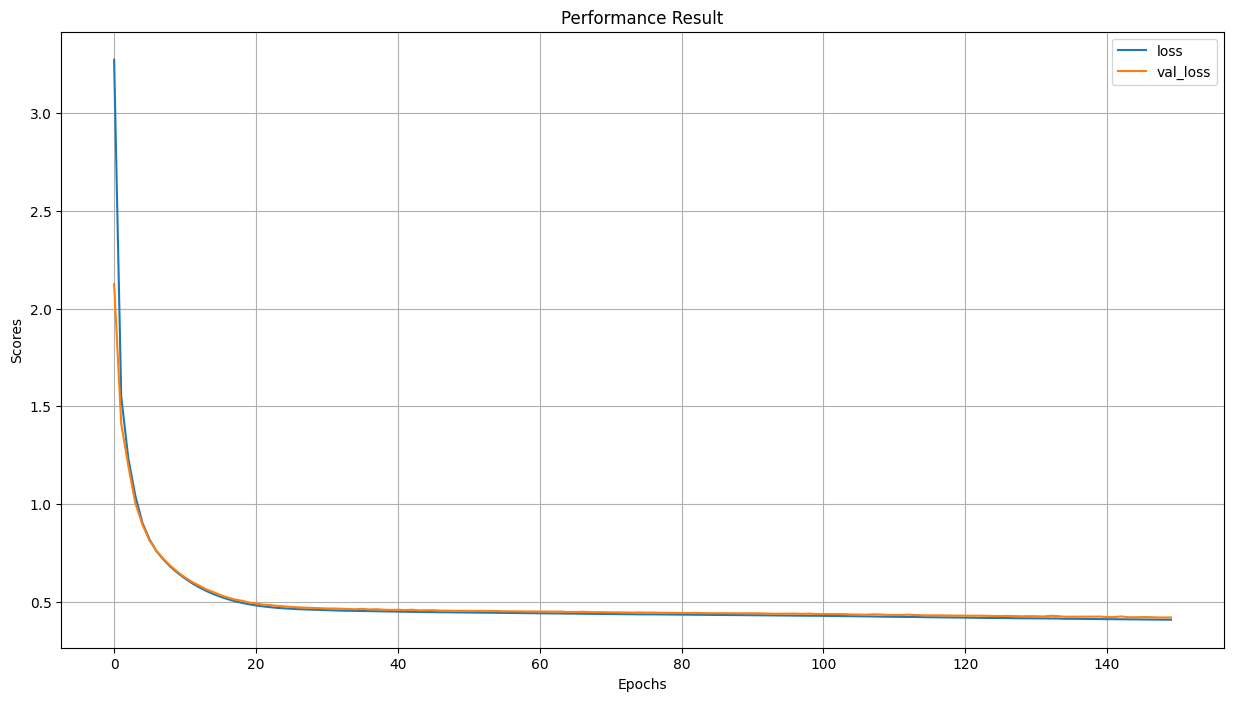

In [ ]:
pd.DataFrame(reg_result.history).plot(figsize=(15, 8))

plt.title("Performance Result")
plt.xlabel("Epochs")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

<font color="red">**- - - - STOP, CEK DULU! - - - -**</font>
<br>Sebelum melakukan evaluasi dan penyimpanan model, **pastikan *val_loss* berada dibawah 0.50** dan **tidak terjadi *overfitting***.
<br>Silakan ulangi langkah diatas sebagai langkah *hyperparameter tuning* jika terjadi.

> <font color="red"> **(Step 4) Evaluate the Model with Test Data** </font>

Lihat dokumentasi **Keras Model.evaluate() method** [**disini**](https://keras.io/api/models/model_training_apis/#evaluate-method).

In [ ]:
regression_model.evaluate([x_test_A, x_test_B], [y_test, y_test])

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4166


0.4315020442008972

> <font color="red"> **(Step 4) Save and Reload the Model** </font>

In [ ]:
# TODO: Berikan nama file untuk model, diakhiri dengan ekstensi .keras
filename = "KelompokA-Regression.keras"

# save the model into your local storage
regression_model.save(filename)

In [ ]:
# TODO: Reload model dan lakukan prediksi dengan data baru (x_new_A dan x_new_B)
this_model = keras.models.load_model(filename)
this_model.predict([x_new_A, x_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0.38552734],
       [0.8053701 ],
       [2.8005674 ]], dtype=float32)

### Scoring
Total `#TODO` = 10
<br>Checklist:

- [ ] Ubah "features" dan "target" dari Numpy Array ke Pandas DataFrame
- [ ] Pisahkan data menjadi train, validation, dan test
- [ ] Lakukan standarisasi untuk data train, validation, dan test menggunakan StandardScaler()
- [ ] Lakukan normalisasi untuk data train, validation, dan test menggunakan MinMaxScaler()
- [ ] Buat hidden layer pertama dengan 30 neuron dan ReLU sebagai activation function
- [ ] Buat hidden layer kedua dengan 30 neuron dan ReLU sebagai activation function
- [ ] Tentukan jumlah epoch (iterasi)
- [ ] Tentukan jumlah batch
- [ ] Berikan nama file untuk model, diakhiri dengan ekstensi .keras
- [ ] Reload model dan lakukan prediksi dengan data baru (`x_new_A` dan `x_new_B`)

### Additional readings
- N/A

### Copyright © 2024 Startup Campus, Indonesia
* Prepared by **Nicholas Dominic, M.Kom.** [(profile)](https://linkedin.com/in/nicholas-dominic)
* You may **NOT** use this file except there is written permission from PT. Kampus Merdeka Belajar (Startup Campus).
* Please address your questions to mentors.